In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("TESLA.csv")
df=df.dropna()
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000,48.174000
1,2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000,48.938000
2,2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000,48.625999
3,2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500,46.605999
4,2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000,46.285999
...,...,...,...,...,...,...,...
634,2022-04-05,1152.869995,1087.300049,1136.300049,1091.260010,26691700,1091.260010
635,2022-04-06,1079.000000,1027.699951,1073.469971,1045.760010,29782800,1045.760010
636,2022-04-07,1076.589966,1021.539978,1052.390015,1057.260010,26482400,1057.260010
637,2022-04-08,1048.439941,1022.440002,1043.209961,1025.489990,18293300,1025.489990


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 [Text(-100.0, 0, '2021-11-17'),
  Text(0.0, 0, '2019-09-30'),
  Text(100.0, 0, '2020-02-24'),
  Text(200.0, 0, '2020-07-16'),
  Text(300.0, 0, '2020-12-07'),
  Text(400.0, 0, '2021-05-03'),
  Text(500.0, 0, '2021-09-23'),
  Text(600.0, 0, '2022-02-15'),
  Text(700.0, 0, '')])

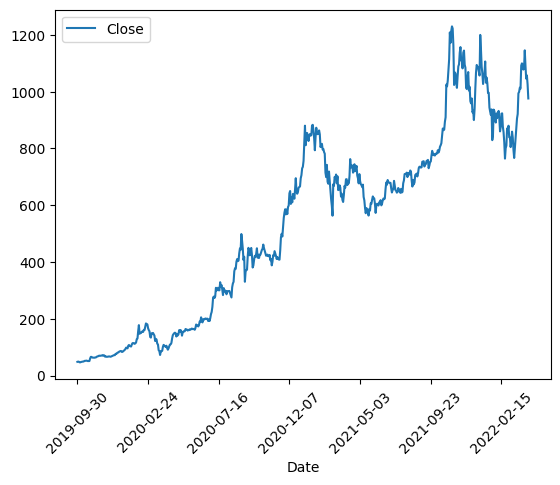

In [6]:
df.plot(x="Date", y="Close")
plt.xticks(rotation=45)

In [11]:
model= RandomForestRegressor()


In [13]:
# Extract features
X = df[['Open', 'High', 'Low', 'Volume']]

# Filter X and y to exclude the last row
X = X.iloc[:-1]
y = df['Close'].iloc[:-1]

# Fit the model
model.fit(X, y)


RandomForestRegressor()

In [14]:
predictions =model.predict(X)
print('The model score is:', model.score(X,y))


The model score is: 0.9998097906201473


In [16]:
new_data= df[['Open', 'High', 'Low', 'Volume']].tail(1)
prediction = model.predict(new_data)
print('The model predicts the last row:', prediction)
print('The actual value:', df[['Close']].tail(1).values[0][0])

The model predicts the last row: [972.97388975]
The actual value: 975.9299927
